# Facebook-Daten
Forschungsfrage der Bachelorarbeit war: Welchen Einfluss hat Counter Speech auf Incivility im Kontext von online-Diskussionen auf Facebook-Seiten großer deutscher Medienmarken?

* Experimentalgruppe (EG): Posts mit [#ichbinhier](https://www.facebook.com/groups/718574178311688/)-Aktion. Hier gab es einen experimentalen Stimulus: Counter Speech    
* Kontrollgruppe (KG): Posts ohne Aktion

Hier wird als Projekt ein Teil der Auswertungen, die ich gemacht habe, gezeigt.

## EG einlesen

In [1]:
import pandas as pd
import pylab as plt
import numpy as np
import datetime
%matplotlib inline

df_eg = pd.read_csv('ichbinhier_facebook_comments.csv', parse_dates=['created_time', 'post_created_time'])
df_eg.fillna(0, inplace=True)
df_eg = df_eg.rename(columns={'id': 'comment_id', 'created_time': 'comment_created_time'})

df_eg['timedelta'] = df_eg['comment_created_time'] - df_eg['post_created_time']

df_eg.head()

,comment_id,medium,message,attachment_title,attachment_type,attachment_url,user_id,user_name,comment_created_time,post_id,post_message,post_created_time,tlc,slc,parent_id,parent_message,permalink_url,timedelta
0,10154824449757554_10154824451082554,N24,Fck AfD!!!,0,0,0,376584259481315,Manuel K. Rie,2017-09-24 17:39:33,95242447553_10154824449757554,Das ist der nächste Tabu-Bruch.,2017-09-24 17:39:08,1.0,0.0,0,0,https://www.facebook.com/N24/posts/10154824449...,00:00:25
1,10154824449757554_10154824451537554,N24,Mit einer erhobenen Hand bestimmt....,0,0,0,1584697721605809,Stefan Kranich,2017-09-24 17:39:45,95242447553_10154824449757554,Das ist der nächste Tabu-Bruch.,2017-09-24 17:39:08,1.0,0.0,0,0,https://www.facebook.com/N24/posts/10154824449...,00:00:37
2,10154824449757554_10154824451832554,N24,"Gratulation an die 87% der Wähler, die die AfD...",0,0,0,1716950448357305,Danny Haddadin,2017-09-24 17:39:54,95242447553_10154824449757554,Das ist der nächste Tabu-Bruch.,2017-09-24 17:39:08,1.0,0.0,0,0,https://www.facebook.com/N24/posts/10154824449...,00:00:46
3,10154824449757554_10154824452042554,N24,Debb Ie 😡,0,0,0,1577213762357298,Sandy Noelle,2017-09-24 17:39:58,95242447553_10154824449757554,Das ist der nächste Tabu-Bruch.,2017-09-24 17:39:08,1.0,0.0,0,0,https://www.facebook.com/N24/posts/10154824449...,00:00:50
4,10154824449757554_10154824452607554,N24,Ist natürlich eine sehr Reife Art seine Meinun...,0,0,0,1799749093430379,Pascal Schneider,2017-09-24 17:40:20,95242447553_10154824449757554,Das ist der nächste Tabu-Bruch.,2017-09-24 17:39:08,0.0,1.0,10154824449757554_10154824451082554,Fck AfD!!!,https://www.facebook.com/N24/posts/10154824449...,00:01:12


In [2]:
eg_post_ids = df_eg['post_id'].unique().tolist()
df_eg.groupby('post_id')['comment_id'].count().describe()

count      75.000000
mean     1183.840000
std       731.027194
min       373.000000
25%       723.000000
50%       907.000000
75%      1370.500000
max      3788.000000
Name: comment_id, dtype: float64

## Posts in der EG, Lagemaße der Kommentare

Text(0.5,1,'n = 88788')

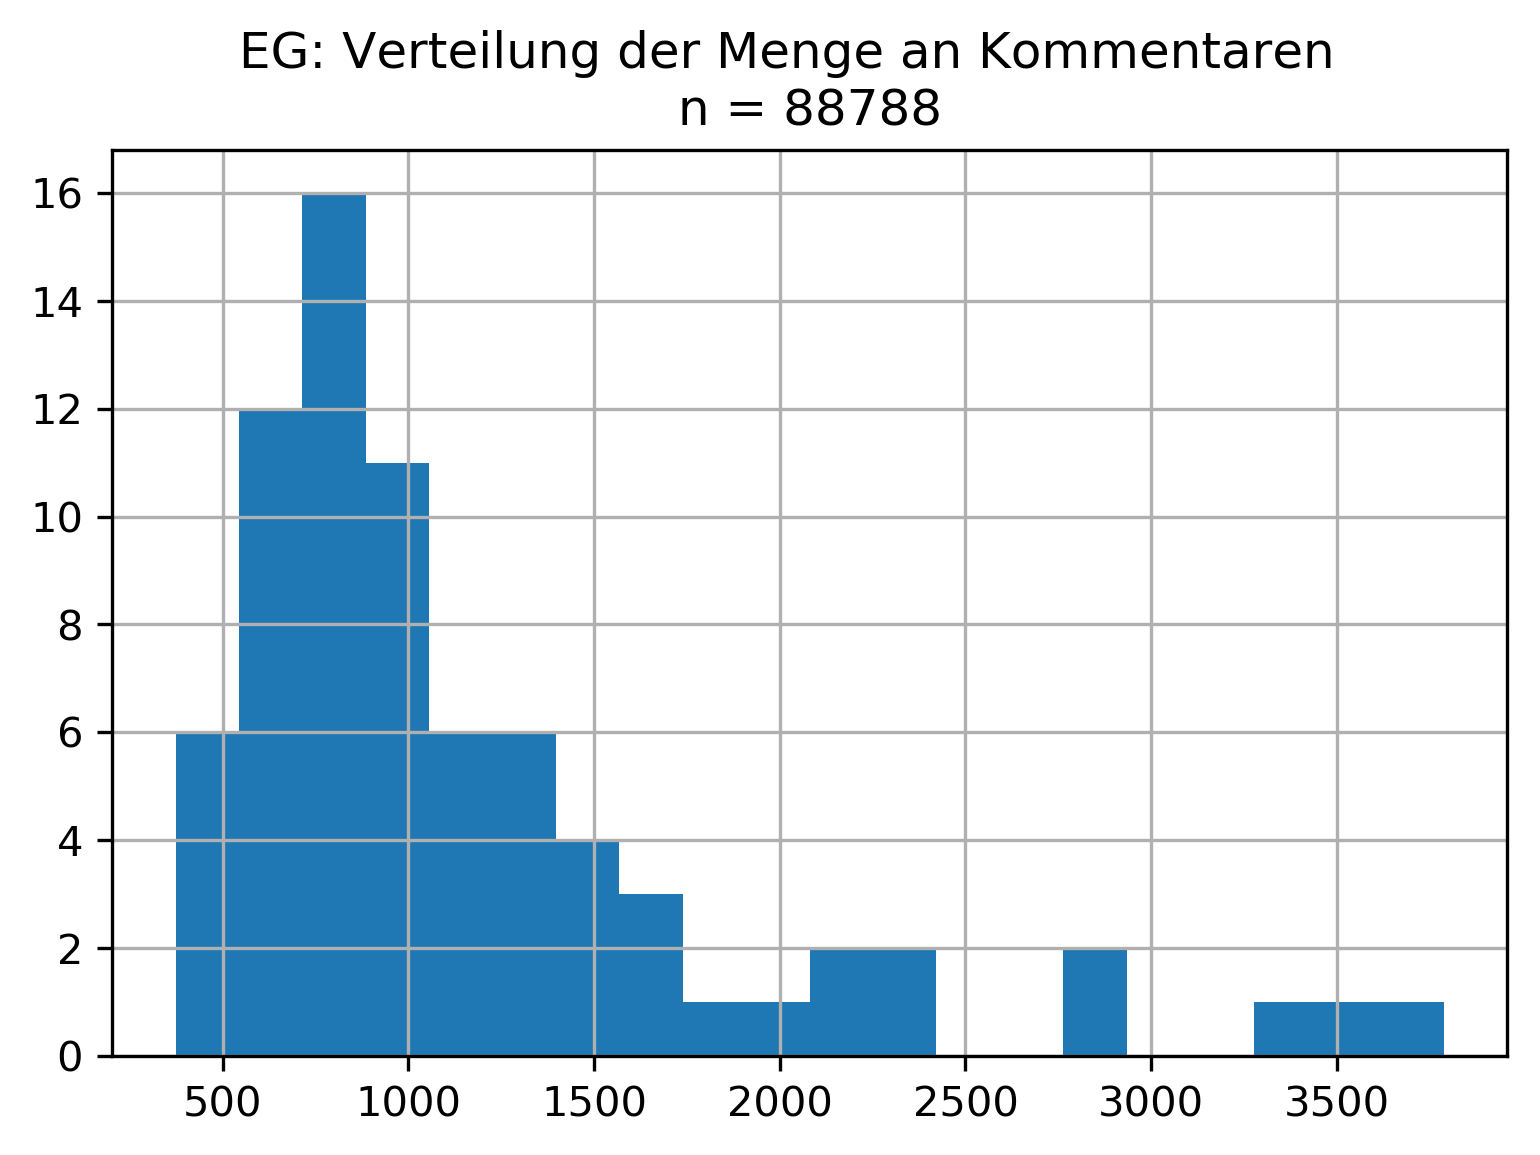

In [3]:
plt.figure(dpi=300)
df_eg.groupby('post_id')['comment_id'].count().hist(bins=20)
plt.suptitle('EG: Verteilung der Menge an Kommentaren')
plt.title('n = {}'.format(df_eg.shape[0]))
#plt.savefig('eg posts hist.png')

## Nach Medium in EG

In [4]:
g_eg = df_eg.groupby('medium')['post_id'].value_counts()

vergleich_eg = pd.DataFrame({
    'N24': g_eg.loc['N24'],
    'tagesschau': g_eg.loc['tagesschau'],
    'bild': g_eg.loc['bild'],
    'ZDFheute': g_eg.loc['ZDFheute']
})
vergleich_eg.describe().round(1).transpose().sort_values(by=['mean'])

,count,mean,std,min,25%,50%,75%,max
N24,20.0,748.1,282.7,373.0,571.8,707.5,825.2,1613.0
bild,21.0,1293.6,720.3,516.0,729.0,979.0,1636.0,2889.0
ZDFheute,19.0,1356.6,798.1,662.0,892.0,1199.0,1461.0,3586.0
tagesschau,15.0,1392.3,883.0,473.0,842.5,1146.0,1749.0,3788.0


Text(0.5,1,'n = 88788')

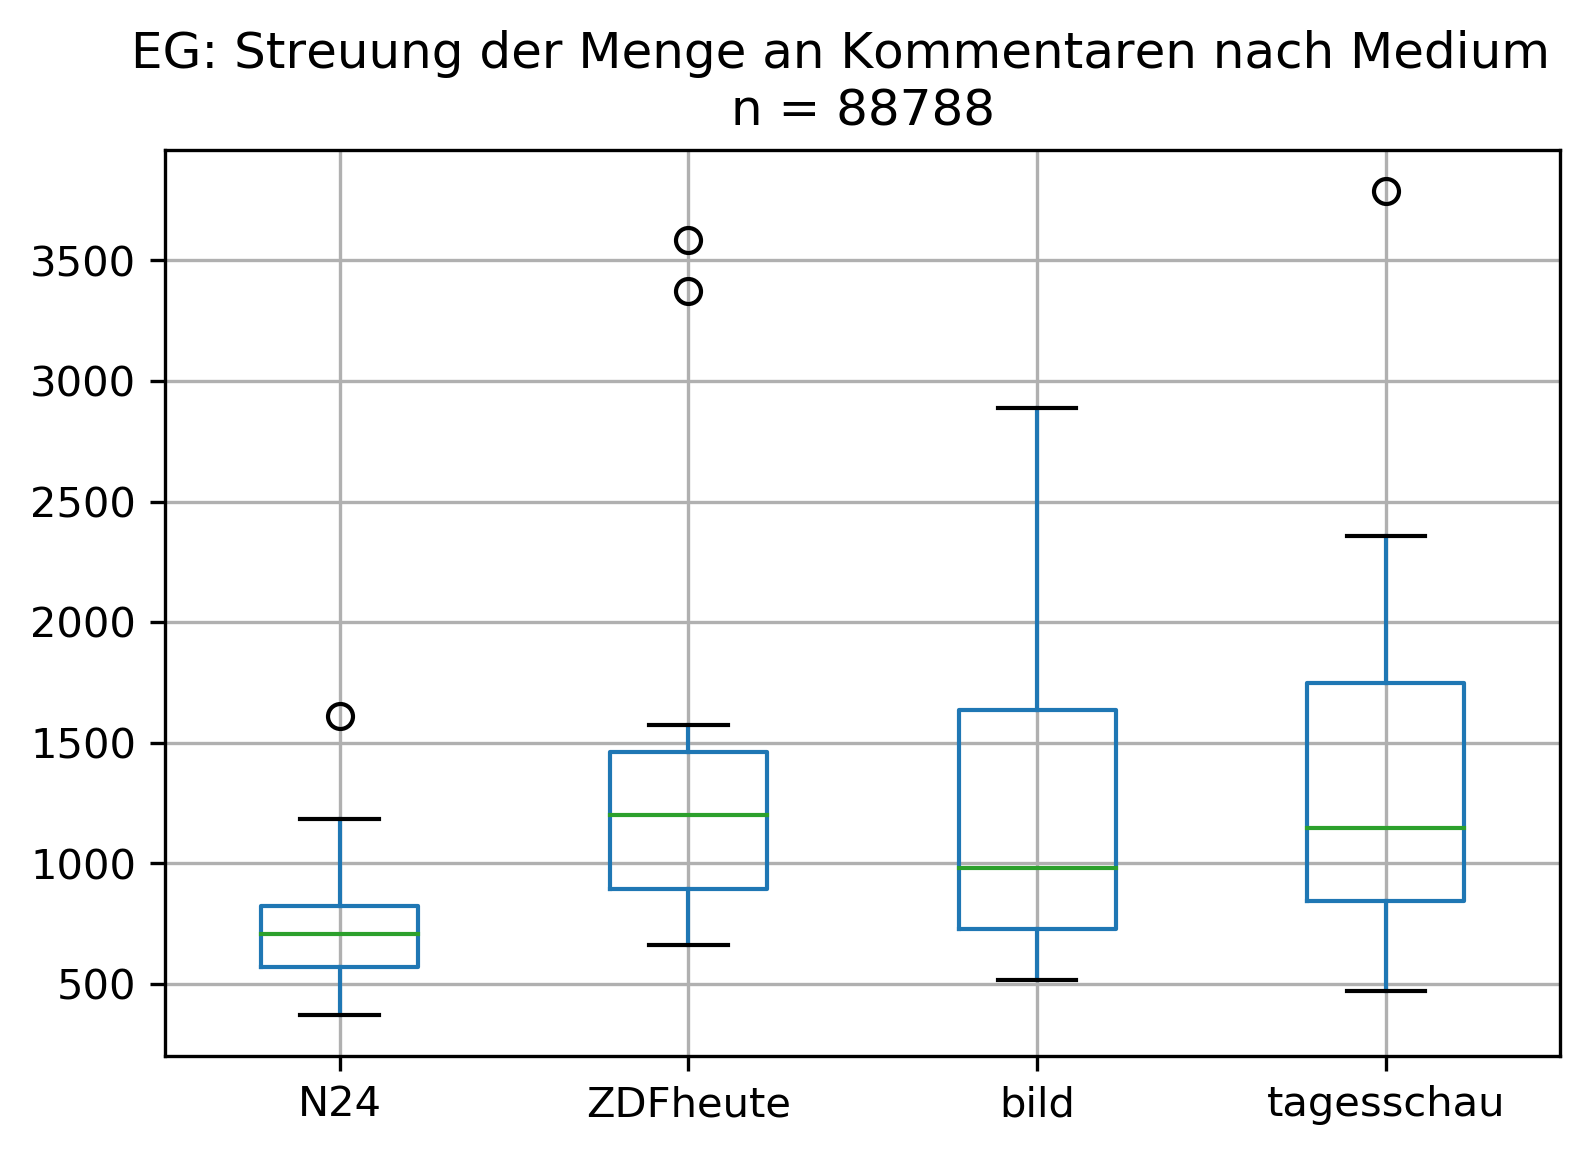

In [5]:
plt.figure(dpi=300)
vergleich_eg.boxplot()
plt.suptitle('EG: Streuung der Menge an Kommentaren nach Medium')
plt.title('n = {}'.format(df_eg.shape[0]))

## KG einlesen

In [6]:
df_n24 = pd.read_csv('/Users/leonard/Desktop/Zwischenspeicher/N24/N24_facebook_comments.csv', parse_dates=['created_time'])
df_bild = pd.read_csv('/Users/leonard/Desktop/Zwischenspeicher/bild/bild_facebook_comments.csv', low_memory=False, parse_dates=['created_time'])
df_tagesschau = pd.read_csv('/Users/leonard/Desktop/Zwischenspeicher/tagesschau/tagesschau_facebook_comments.csv', low_memory=False, parse_dates=['created_time'])
df_zdfheute = pd.read_csv('/Users/leonard/Desktop/Zwischenspeicher/ZDFheute/ZDFheute_facebook_comments.csv', low_memory=False, parse_dates=['created_time'])

df_tagesschau.fillna(0, inplace=True)
df_n24.fillna(0, inplace=True)
df_bild.fillna(0, inplace=True)
df_zdfheute.fillna(0, inplace=True)

df_n24['medium'] = 'N24'
df_tagesschau['medium'] = 'tagesschau'
df_zdfheute['medium'] = 'ZDFheute'
df_bild['medium'] = 'bild'

df_all = df_n24.append(df_tagesschau, ignore_index=True)
df_all = df_all.append(df_zdfheute, ignore_index=True)
df_all = df_all.append(df_bild, ignore_index=True)

statuses_zdfheute = pd.read_csv('/Users/leonard/Desktop/Zwischenspeicher/ZDFheute/ZDFheute_facebook_statuses.csv', parse_dates=['created_time'])
statuses_bild = pd.read_csv('/Users/leonard/Desktop/Zwischenspeicher/bild/bild_facebook_statuses.csv', parse_dates=['created_time'])
statuses_N24 = pd.read_csv('/Users/leonard/Desktop/Zwischenspeicher/N24/N24_facebook_statuses.csv', parse_dates=['created_time'])
statuses_tagesschau = pd.read_csv('/Users/leonard/Desktop/Zwischenspeicher/tagesschau/tagesschau_facebook_statuses.csv', parse_dates=['created_time'])
statuses_kg = statuses_zdfheute.append(statuses_bild, ignore_index=True)
statuses_kg = statuses_kg.append(statuses_N24, ignore_index=True)
statuses_kg = statuses_kg.append(statuses_tagesschau, ignore_index=True)
statuses_kg = statuses_kg.rename(index=str, columns={'id': 'post_id', 'created_time': 'post_created_time'})

# Posts der EG von KG abziehen
criterion = df_all['post_id'].map(lambda x: x not in eg_post_ids)
df_kg = df_all[criterion]
df_kg = df_kg.rename(columns={'id': 'comment_id', 'created_time': 'comment_created_time'})

df_kg.shape

(208750, 16)

In [7]:
df_kg.head()

,comment_id,message,attachment_title,attachment_type,attachment_url,user_id,user_name,comment_created_time,post_id,post_message,tlc,slc,parent_id,parent_message,permalink_url,medium
0,10154824600882554_10154824868347554,Happy Day,0,0,0,312710299138804,Mohamed Sami,2017-09-24 19:59:33,95242447553_10154824600882554,Das war die Bundestagswahl 2017: Dramatische V...,1.0,0.0,0,0,https://www.facebook.com/N24/videos/1015482460...,N24
1,10154824600882554_10154824868527554,¯\_(ツ)_/¯,0,0,0,204959380070010,Michał Brzoska,2017-09-24 19:59:36,95242447553_10154824600882554,Das war die Bundestagswahl 2017: Dramatische V...,1.0,0.0,0,0,https://www.facebook.com/N24/videos/1015482460...,N24
2,10154824600882554_10154824868647554,Schon wieder die alte...,0,0,0,1512608042121278,Michele Mauritz,2017-09-24 19:59:38,95242447553_10154824600882554,Das war die Bundestagswahl 2017: Dramatische V...,1.0,0.0,0,0,https://www.facebook.com/N24/videos/1015482460...,N24
3,10154824600882554_10154824868812554,Traurig..,0,0,0,10156137393286388,Hawi Noor,2017-09-24 19:59:44,95242447553_10154824600882554,Das war die Bundestagswahl 2017: Dramatische V...,1.0,0.0,0,0,https://www.facebook.com/N24/videos/1015482460...,N24
4,10154824600882554_10154824869052554,Glückwunsch an die AfD,0,0,0,354469251687221,Doris Reiter,2017-09-24 19:59:47,95242447553_10154824600882554,Das war die Bundestagswahl 2017: Dramatische V...,1.0,0.0,0,0,https://www.facebook.com/N24/videos/1015482460...,N24


In [8]:
statuses_kg.head()

,post_id,message,name,total_count,link,post_created_time,permalink_url
0,112784955679_10155810474825680,Martin Schulz attackiert in der Berliner Runde...,Schulz attackiert Merkel,781,https://www.facebook.com/ZDFheute/videos/10155...,2017-09-24 19:29:07,https://www.facebook.com/ZDFheute/videos/10155...
1,112784955679_10155810067805680,"Martin Schulz wird SPD-Chef bleiben, aber nich...","""Ein schwerer und bitterer tag für die Soziald...",234,https://www.facebook.com/ZDFheute/videos/10155...,2017-09-24 18:24:08,https://www.facebook.com/ZDFheute/videos/10155...
2,112784955679_10155809738880680,Verfolgen Sie die Prognose um 18 Uhr und die e...,#btw17: Die Prognose live,2114,https://www.facebook.com/ZDFheute/videos/10155...,2017-09-24 16:56:09,https://www.facebook.com/ZDFheute/videos/10155...
3,112784955679_10155796511095680,"Weil ihre Freundin misshandelt wurde, gründete...",Shefighter: Kampfsport-Schule in Jordanien,85,https://www.facebook.com/ZDFheute/videos/10155...,2017-09-24 09:28:00,https://www.facebook.com/ZDFheute/videos/10155...
4,112784955679_1747746941904213,Anders als von Alexander Gauland behauptet: Di...,#ZDFcheck: AfD hat gezielt Proteste gegen Merk...,1571,https://www.facebook.com/ZDFheute/videos/17477...,2017-09-23 10:47:30,https://www.facebook.com/ZDFheute/videos/17477...


Text(0.5,1,'n = 208750')

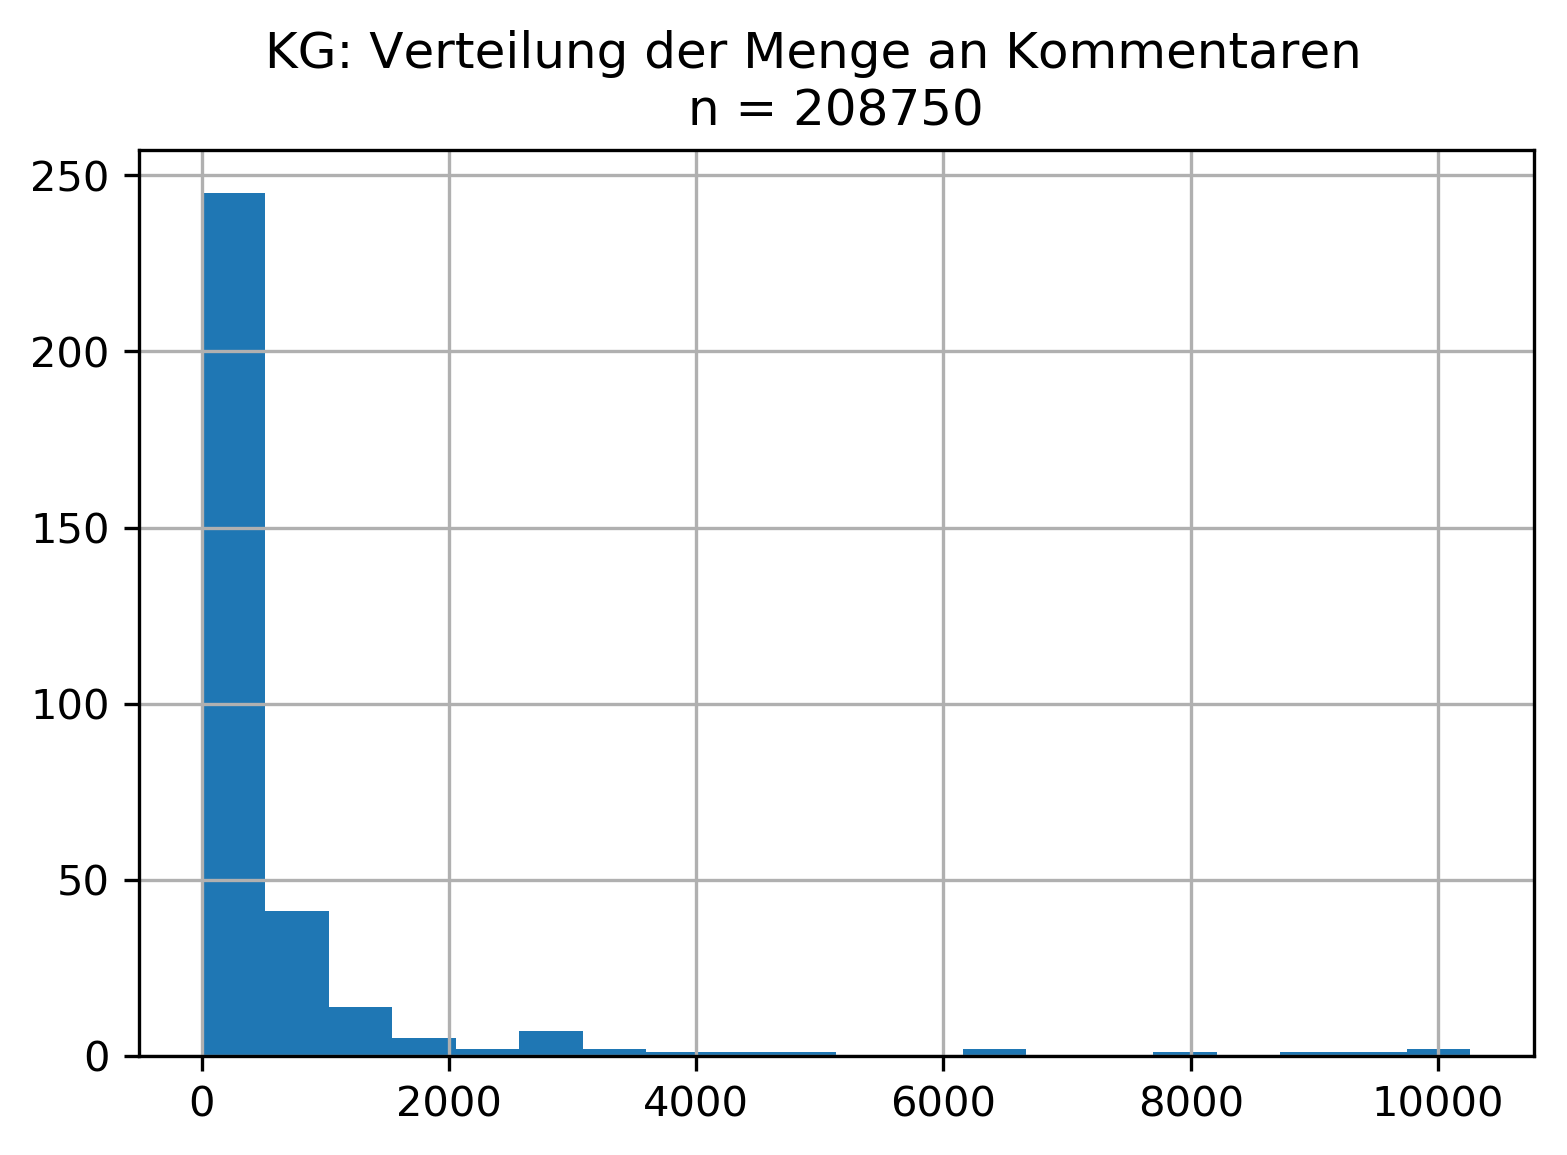

In [9]:
plt.figure(dpi=300)
df_kg.groupby('post_id')['comment_id'].count().hist(bins=20)
plt.suptitle('KG: Verteilung der Menge an Kommentaren')
plt.title('n = {}'.format(df_kg.shape[0]))
#plt.savefig('eg posts hist.png')

## Nach Medium

In [10]:
g_kg = df_kg.groupby('medium')['post_id'].value_counts()
g_kg.describe()

count      326.000000
mean       640.337423
std       1369.850362
min          3.000000
25%        106.000000
50%        238.000000
75%        512.000000
max      10261.000000
Name: post_id, dtype: float64

In [11]:
vergleich_kg = pd.DataFrame({
    'bild': g_kg.loc['bild'],
    'N24': g_kg.loc['N24'],
    'ZDFheute': g_kg.loc['ZDFheute'],
    'tagesschau': g_kg.loc['tagesschau']
})
vergleich_kg.describe().round(1).transpose().sort_values(by=['mean'])

,count,mean,std,min,25%,50%,75%,max
ZDFheute,68.0,241.9,302.9,15.0,67.8,149.0,301.2,1917.0
N24,86.0,480.3,734.8,10.0,107.2,214.5,428.0,4283.0
tagesschau,62.0,498.8,906.1,12.0,127.5,287.0,466.5,6298.0
bild,110.0,1091.5,2079.0,3.0,153.2,346.5,902.5,10261.0


Text(0.5,1,'n = 208750')

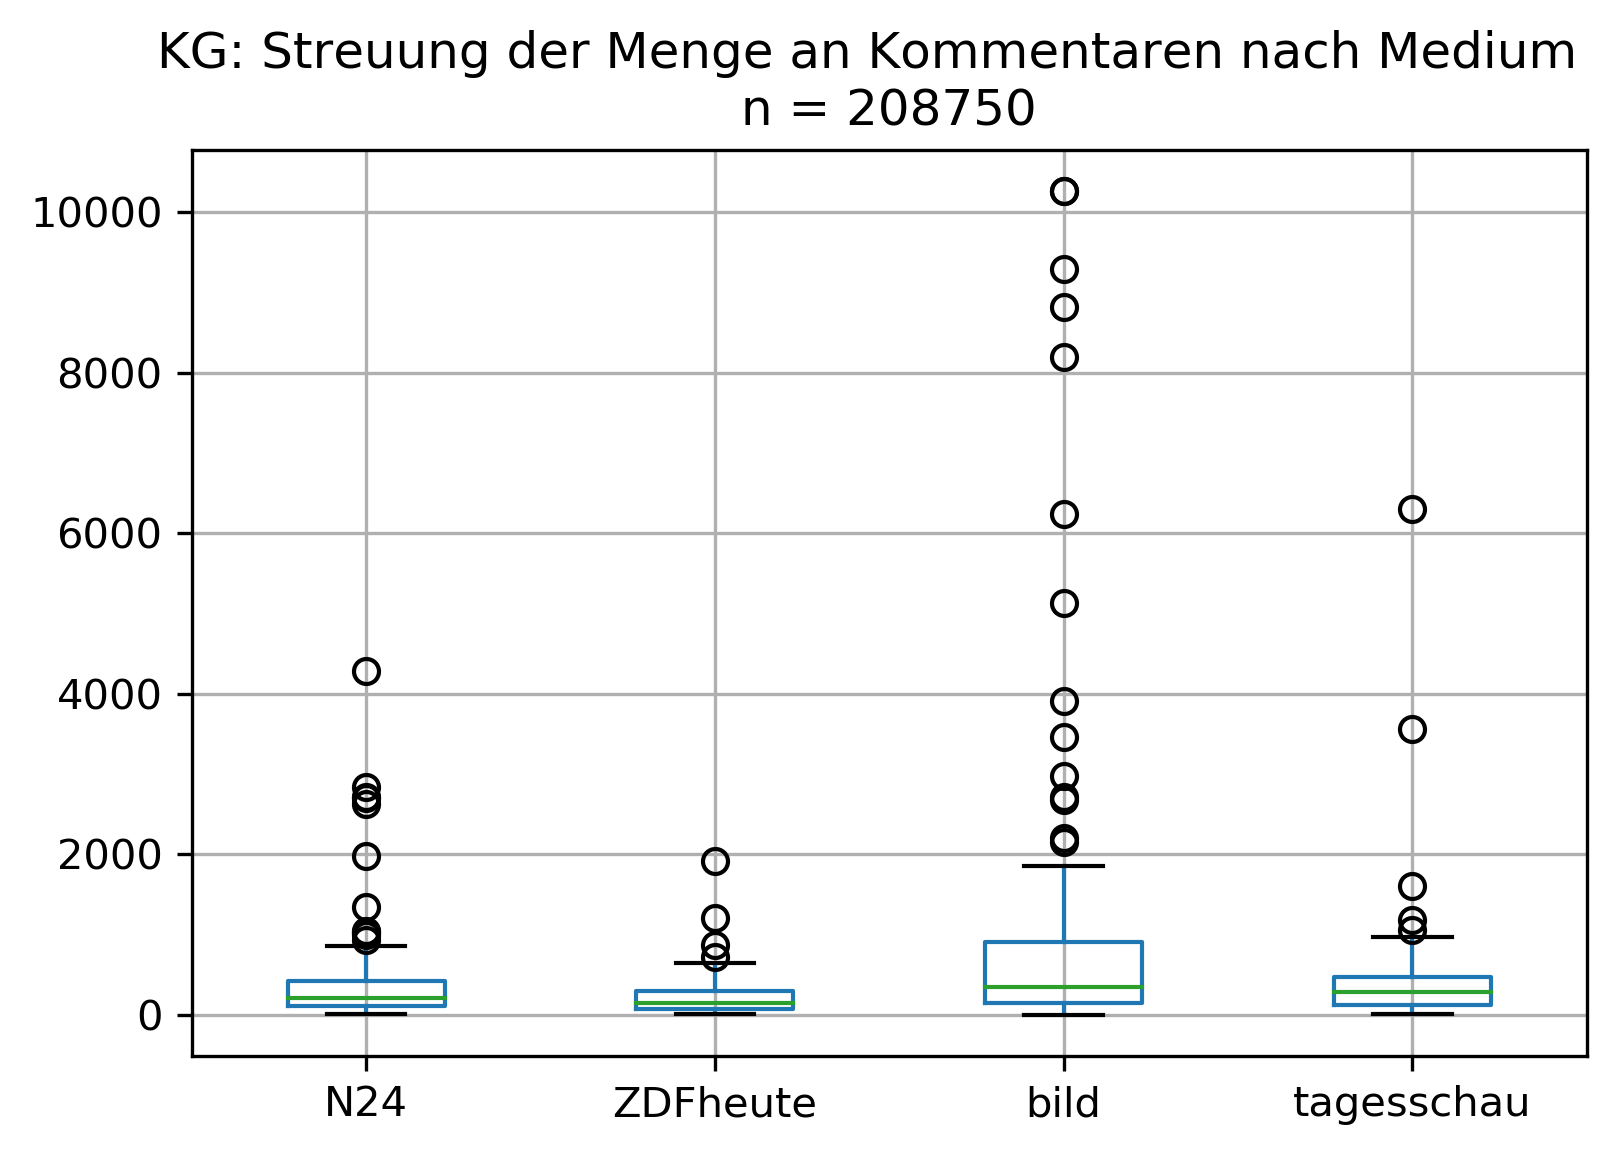

In [12]:
plt.figure(dpi=300)
vergleich_kg.boxplot()
plt.suptitle('KG: Streuung der Menge an Kommentaren nach Medium')
plt.title('n = {}'.format(df_kg.shape[0]))

## Auswertung nach Zeit

In [13]:
kg_post_times = statuses_kg[['post_id', 'post_created_time']]

kg_comment_times = df_kg[['comment_id', 'post_id', 'comment_created_time']]

time_diff = pd.merge(kg_comment_times, kg_post_times, on='post_id')
time_diff['timedelta'] = time_diff['comment_created_time'] - time_diff['post_created_time']

# KG und EG Timedeltas zusammenführen
time_diff = time_diff.append(df_eg[['comment_id', 'timedelta']])

print(time_diff.describe())

def timedelta_splits_dict():
    '''Generiert Kommentare pro Post nach Stunden'''
    
    # Kategorien
    timedelta_splits = []
    for i in range(0,48):
        timedelta_splits.append('{:0>2}-{:0>2}'.format(i, i+1))
    
    timedelta_dict = {}
    for i, split in enumerate(timedelta_splits):
        timedelta_dict[split] = time_diff[(time_diff['timedelta'] > pd.Timedelta(hours=i)) & (time_diff['timedelta'] < pd.Timedelta(hours=i+1))]['post_id'].value_counts()
    
    timedelta_dict['48+'] = time_diff[pd.Timedelta(hours=48) < time_diff['timedelta']]['post_id'].value_counts()
    
    return timedelta_dict

df_time = pd.DataFrame(timedelta_splits_dict())
df_time.fillna(0, inplace=True)
print(df_time.shape)
df_time.head()

                    timedelta
count                  297538
mean   0 days 16:51:08.083145
std    3 days 23:09:26.232595
min         -1 days +06:16:40
25%           0 days 01:08:07
50%           0 days 03:56:27
75%           0 days 13:53:24
max         115 days 02:32:19
(326, 49)


,00-01,01-02,02-03,03-04,04-05,05-06,06-07,07-08,08-09,09-10,...,39-40,40-41,41-42,42-43,43-44,44-45,45-46,46-47,47-48,48+
112784955679_10155333520103859,171.0,55.0,52.0,38.0,33.0,47.0,23.0,7.0,4.0,3.0,...,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,0.0,9.0
112784955679_10155426630177931,25.0,17.0,7.0,1.0,5.0,5.0,6.0,1.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
112784955679_10155682398400680,189.0,9.0,3.0,5.0,6.0,0.0,1.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112784955679_10155682987740680,81.0,19.0,27.0,6.0,5.0,5.0,10.0,4.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,10.0
112784955679_10155685834560680,34.0,14.0,6.0,5.0,7.0,1.0,2.0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Reale Anzahl Kommentare pro Post aufsummieren
df_time['sum'] = df_time.loc[:,'00-01':'48+'].sum(axis=1)
# Anteil an Gesamt pro Stunde
df_time_ratio = df_time.loc[:,'00-01':'48+'].div(df_time.loc[:,'sum'], axis=0)
# 48+ Kategorie wieder löschen, da nur für Berechnung der Anteile gebraucht
df_time_ratio.drop('48+', 1, inplace=True)
df_time_ratio.head()

,00-01,01-02,02-03,03-04,04-05,05-06,06-07,07-08,08-09,09-10,...,38-39,39-40,40-41,41-42,42-43,43-44,44-45,45-46,46-47,47-48
112784955679_10155333520103859,0.333333,0.107212,0.101365,0.074074,0.064327,0.091618,0.044834,0.013645,0.007797,0.005848,...,0.001949,0.0,0.0,0.001949,0.0,0.003899,0.0,0.001949,0.001949,0.0
112784955679_10155426630177931,0.287356,0.195402,0.080460,0.011494,0.057471,0.057471,0.068966,0.011494,0.057471,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
112784955679_10155682398400680,0.863014,0.041096,0.013699,0.022831,0.027397,0.000000,0.004566,0.004566,0.009132,0.004566,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0
112784955679_10155682987740680,0.413265,0.096939,0.137755,0.030612,0.025510,0.025510,0.051020,0.020408,0.000000,0.005102,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.005102,0.000000,0.0
112784955679_10155685834560680,0.357895,0.147368,0.063158,0.052632,0.073684,0.010526,0.021053,0.031579,0.000000,0.010526,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0


([<matplotlib.axis.XTick at 0x11f7d5908>,
 <a list of 49 Text xticklabel objects>)

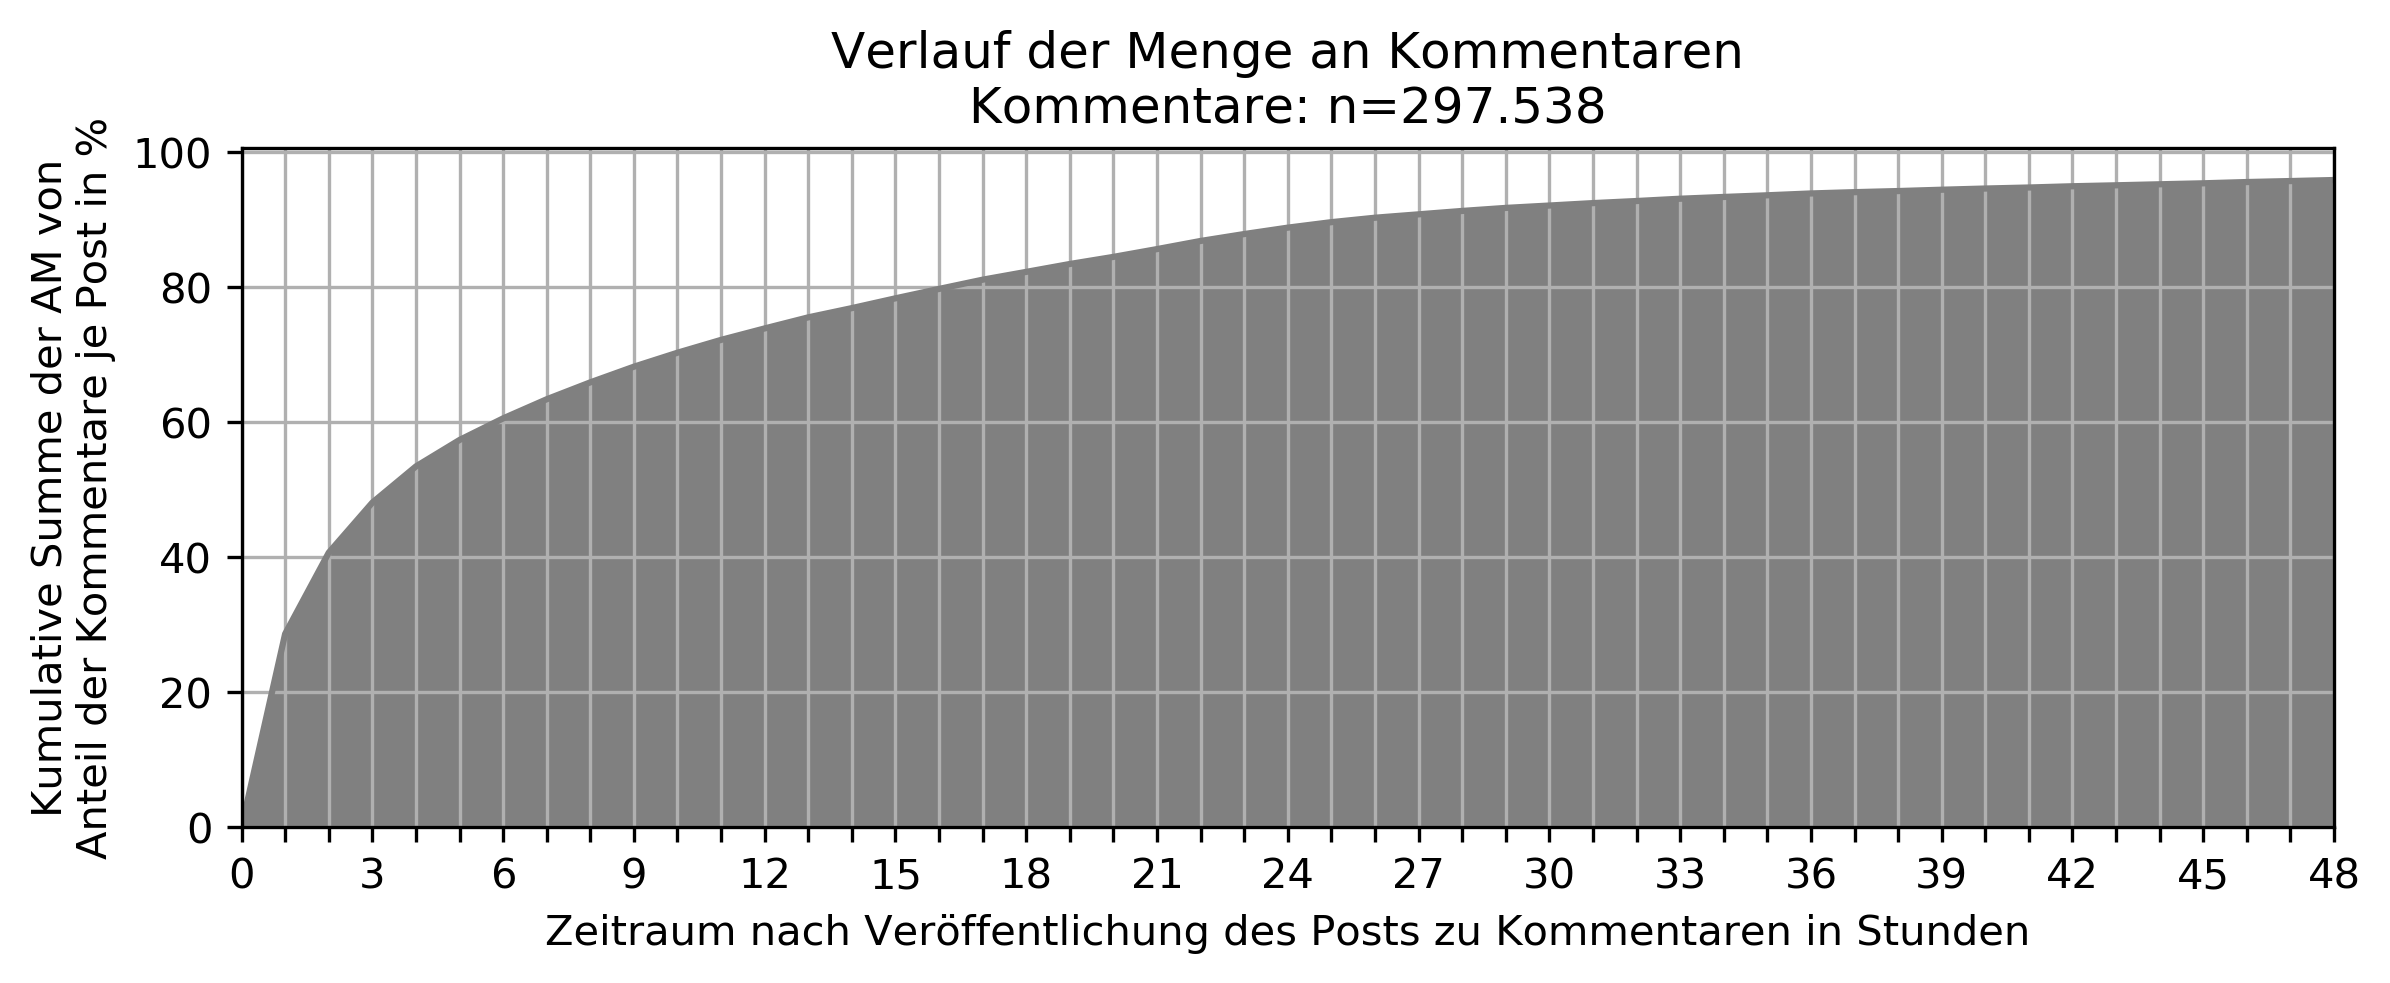

In [15]:
# AM der Stundensplits in CumSum
time_ratio_mean = df_time_ratio.mean()
time_ratio_mean['00-00'] = 0.0
time_ratio_mean.sort_index(inplace=True)

time_ratio_cs = time_ratio_mean.cumsum()*100

xlabels = time_ratio_cs.index.tolist()
xticks = []
for i in xlabels:
    i = int(i[-2:])
    if i % 3 == 0:
        xticks.append(i)
    else:
        xticks.append(' ')

plt.figure(figsize=(9,3), dpi=300)
time_ratio_cs.plot(kind='area', grid=True, color='gray')
plt.title('Verlauf der Menge an Kommentaren\nKommentare: n=297.538')
plt.xlabel('Zeitraum nach Veröffentlichung des Posts zu Kommentaren in Stunden')
plt.ylabel('Kumulative Summe der AM von\nAnteil der Kommentare je Post in %')
plt.xticks(np.arange(49), tuple(xticks))


In [16]:
# Zeitpunkt ab dem über 90 Prozent aller Kommentare abgegeben werden liegt etwa bei 24 Stunden (-> Relevanz).
time_ratio_cs

00-00     0.000000
00-01    28.635618
01-02    40.670676
02-03    48.086609
03-04    53.450981
04-05    57.369041
05-06    60.570390
06-07    63.402985
07-08    65.908354
08-09    68.228586
09-10    70.299030
10-11    72.202314
11-12    73.898353
12-13    75.540415
13-14    76.909657
14-15    78.358744
15-16    79.751922
16-17    81.120227
17-18    82.277792
18-19    83.445754
19-20    84.498859
20-21    85.653879
21-22    86.859393
22-23    87.883571
23-24    88.831731
24-25    89.645255
25-26    90.302407
26-27    90.804313
27-28    91.307782
28-29    91.756546
29-30    92.108749
30-31    92.468152
31-32    92.777833
32-33    93.117320
33-34    93.380556
34-35    93.625743
35-36    93.897983
36-37    94.090283
37-38    94.254242
38-39    94.451059
39-40    94.627729
40-41    94.779630
41-42    94.965704
42-43    95.107054
43-44    95.257801
44-45    95.402861
45-46    95.590515
46-47    95.736564
47-48    95.888755
dtype: float64